Chapter 16
# NumPy数组规整
Book_1《编程不难》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os

# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 定义可视化函数

In [74]:
def visualize_2D(array, title, vmax, vmin):
    
    fig_width  = math.ceil(array.shape[1] * 0.5)
    fig_length = math.ceil(array.shape[0] * 0.5)
    
    fig, ax = plt.subplots(figsize=(fig_width, fig_length))
    # 注意，seaborn.heatmap() 目前只能接受2D数组
    # 本书中，一维数组可视化时用圆圈
    # 可视化时，只有二维、三维数组用方块
    
    sns.heatmap(array, 
                vmax = vmax,
                vmin = vmin,
                annot = True,      # 增加注释
                fmt = ".0f",       # 注释数值的格式
                square = True,     # 热图方格为正方形
                cmap = 'RdYlBu_r', # 指定色谱
                linewidths = .5,   # 方格线宽
                cbar = False,      # 不显示色谱条
                yticklabels=False, # 不显示纵轴标签
                xticklabels=False, # 不显示横轴标签
                ax = ax)           # 指定绘制热图的轴
    
    fig.savefig('Figures/' + title + '.svg', format='svg')

# 定义绘制一元数组可视化函数

def visualize_1D(array, title, vmax, vmin):
    fig, ax = plt.subplots()
    
    cmap = plt.colormaps.get_cmap("RdYlBu_r")
    
    array_norm = (array - vmin) / (vmax - vmin)

    colors = cmap(array_norm)

    for idx in range(len(array)):

        circle_idx = plt.Circle((idx, 0), 0.5, facecolor=colors[idx], edgecolor = 'w')
        ax.add_patch(circle_idx)
        ax.text(idx, 0, s = "{:.1f}".format(array[idx]),
                horizontalalignment = 'center',
                verticalalignment = 'center')

    ax.set_xlim(-0.6, 0.6 + len(array))
    ax.set_ylim(-0.6, 0.6)
    ax.set_aspect('equal', adjustable='box')
    ax.axis('off')
    fig.savefig('Figures/' + title + '.svg', format='svg')

## 堆叠

In [3]:
a1 = np.arange(1, 5 + 1)
a1

array([1, 2, 3, 4, 5])

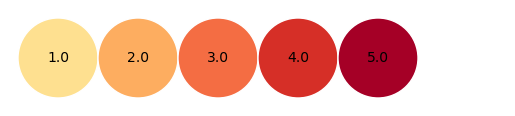

In [75]:
visualize_1D(a1, 'a1，一维', 5, -5)

In [5]:
a2 = np.arange(-5, 0)
a2

array([-5, -4, -3, -2, -1])

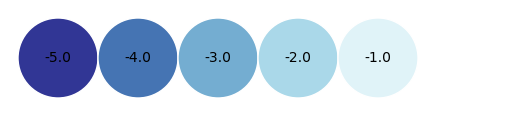

In [76]:
visualize_1D(a2, 'a2，一维', 5, -5)

### 沿行堆叠

In [89]:
np.stack((a1, a2))
# 默认， axis = 0

array([[ 1,  2,  3,  4,  5],
       [-5, -4, -3, -2, -1]])

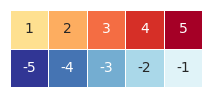

In [85]:
visualize_2D(np.stack((a1, a2)), '沿行叠加，np.stack', 5, -5)

In [143]:
# 多个数组拼接
np.stack((a1, a2, a1, a2, a1, a2))

array([[ 1,  2,  3,  4,  5],
       [-5, -4, -3, -2, -1],
       [ 1,  2,  3,  4,  5],
       [-5, -4, -3, -2, -1],
       [ 1,  2,  3,  4,  5],
       [-5, -4, -3, -2, -1]])

In [78]:
np.row_stack((a1, a2))

array([[ 1,  2,  3,  4,  5],
       [-5, -4, -3, -2, -1]])

In [79]:
np.vstack((a1, a2))

array([[ 1,  2,  3,  4,  5],
       [-5, -4, -3, -2, -1]])

In [11]:
np.vstack((a1.reshape(-1,1), a2.reshape(-1,1)))

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [-5],
       [-4],
       [-3],
       [-2],
       [-1]])

In [200]:
# 创建一个空数组
arr = np.empty((0, 3), dtype=int)

# 通过for循环向数组中添加元素
for i in range(5):
    row = [i, i+1, i+2]
    arr = np.vstack([arr, row])

print(arr)

# 在这个示例中，首先使用np.empty()函数创建了一个空数组，
# 其形状为(0, 3)，表示该数组有0行3列。
# 接着通过for循环，生成一个包含5行3列的数组，
# 每一行的值都是从i开始的三个连续整数。

# 在for循环中，使用np.vstack()函数将每一行添加到数组中。
# np.vstack()函数可以将多个数组沿着垂直方向堆叠起来，
# 因此可以将每一行当作一个数组，
# 然后将它们依次添加到原来的数组中。

[[0 1 2]
 [1 2 3]
 [2 3 4]
 [3 4 5]
 [4 5 6]]


### 沿列堆叠

In [80]:
np.stack((a1, a2), axis = 1)

array([[ 1, -5],
       [ 2, -4],
       [ 3, -3],
       [ 4, -2],
       [ 5, -1]])

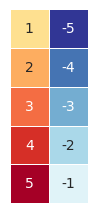

In [86]:
visualize_2D(np.stack((a1, a2), axis = 1), '沿列叠加，np.stack', 5, -5)

In [82]:
np.column_stack((a1, a2))

array([[ 1, -5],
       [ 2, -4],
       [ 3, -3],
       [ 4, -2],
       [ 5, -1]])

In [83]:
np.hstack((a1, a2))
# numpy.hstack 函数可以用来沿着水平方向将多个数组堆叠在一起，形成一个新的数组

array([ 1,  2,  3,  4,  5, -5, -4, -3, -2, -1])

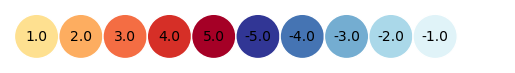

In [87]:
visualize_1D(np.hstack((a1, a2)), 'a1，a2，一维堆叠', 5, -5)

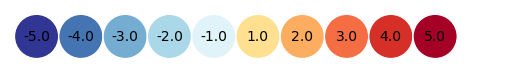

In [88]:
visualize_1D(np.hstack((a2, a1)), 'a1，a2，一维堆叠，反向', 5, -5)

In [84]:
np.hstack((a1.reshape(-1,1), a2.reshape(-1,1)))

array([[ 1, -5],
       [ 2, -4],
       [ 3, -3],
       [ 4, -2],
       [ 5, -1]])

### 拼接numpy.concatenate()

In [132]:
A_3_by_3 = np.arange(-4,4+1).reshape(3,3)
A_3_by_3

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

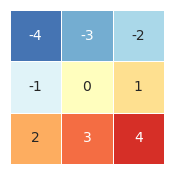

In [133]:
visualize_2D(A_3_by_3, 'A_3_by_3', 5, -5)

In [134]:
B_3_by_1 = np.array([[4, 0, 4]])
B_3_by_1

array([[4, 0, 4]])

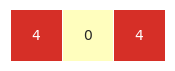

In [141]:
visualize_2D(B_3_by_1, 'B_3_by_1', 5, -5)

In [135]:
B_3_by_1.T
# 转置

array([[4],
       [0],
       [4]])

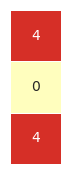

In [142]:
visualize_2D(B_3_by_1.T, 'B_3_by_1.T', 5, -5)

#### 沿行

In [136]:
np.concatenate((A_3_by_3, B_3_by_1), axis=0)

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4],
       [ 4,  0,  4]])

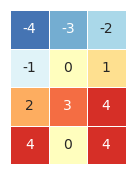

In [137]:
visualize_2D(np.concatenate((A_3_by_3, B_3_by_1), axis=0), '拼接，沿行', 5, -5)

In [138]:
np.vstack((A_3_by_3, B_3_by_1))

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4],
       [ 4,  0,  4]])

#### 沿列

In [128]:
np.concatenate((A_3_by_3, B_3_by_1.T), axis=1)

array([[-4, -3, -2,  4],
       [-1,  0,  1,  0],
       [ 2,  3,  4,  4]])

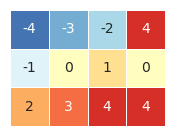

In [140]:
visualize_2D(np.concatenate((A_3_by_3, B_3_by_1.T), axis=1), '拼接，沿列', 5, -5)

In [129]:
np.hstack((A_3_by_3, B_3_by_1.T))

array([[-4, -3, -2,  4],
       [-1,  0,  1,  0],
       [ 2,  3,  4,  4]])

In [130]:
np.concatenate((A_3_by_3, B_3_by_1), axis=None)

array([-4, -3, -2, -1,  0,  1,  2,  3,  4,  4,  0,  4])

### 堆叠结果为三维数组

In [95]:
A = np.arange(1, 24 + 1).reshape(4, -1) 
A

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

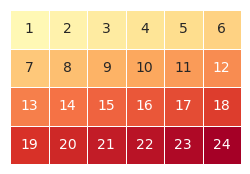

In [96]:
visualize_2D(A, '二维数组A', 24, -24)

In [97]:
B = np.arange(-24, 0).reshape(4, -1)
B

array([[-24, -23, -22, -21, -20, -19],
       [-18, -17, -16, -15, -14, -13],
       [-12, -11, -10,  -9,  -8,  -7],
       [ -6,  -5,  -4,  -3,  -2,  -1]])

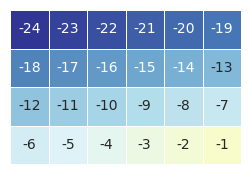

In [98]:
visualize_2D(B, '二维数组B', 24, -24)

#### axis = 0，前后堆叠

In [99]:
A_B_0 = np.stack((A, B))
# 默认叠合方向 axis = 0
A_B_0

array([[[  1,   2,   3,   4,   5,   6],
        [  7,   8,   9,  10,  11,  12],
        [ 13,  14,  15,  16,  17,  18],
        [ 19,  20,  21,  22,  23,  24]],

       [[-24, -23, -22, -21, -20, -19],
        [-18, -17, -16, -15, -14, -13],
        [-12, -11, -10,  -9,  -8,  -7],
        [ -6,  -5,  -4,  -3,  -2,  -1]]])

In [100]:
A_B_0.shape

(2, 4, 6)

In [101]:
# 取出第一页A
A_B_0[0, :, :]

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

In [102]:
A_B_0[0, ...]

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

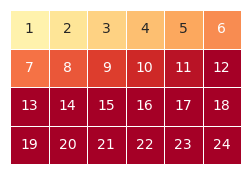

In [103]:
visualize_2D(A_B_0[0, ...], '沿深度堆叠，axis = 0，第0页', 12, -12)

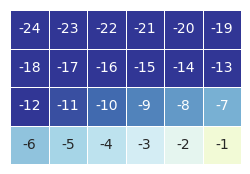

In [104]:
visualize_2D(A_B_0[1, ...], '沿深度堆叠，axis = 0，第1页', 12, -12)

In [105]:
A_B_0[0]

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

#### axis = 1，上下堆叠

In [106]:
A_B_1 = np.stack((A, B), axis=1)  
# dimension 1
A_B_1

array([[[  1,   2,   3,   4,   5,   6],
        [-24, -23, -22, -21, -20, -19]],

       [[  7,   8,   9,  10,  11,  12],
        [-18, -17, -16, -15, -14, -13]],

       [[ 13,  14,  15,  16,  17,  18],
        [-12, -11, -10,  -9,  -8,  -7]],

       [[ 19,  20,  21,  22,  23,  24],
        [ -6,  -5,  -4,  -3,  -2,  -1]]])

In [27]:
A_B_1.shape

(3, 2, 4)

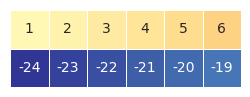

In [113]:
visualize_2D(A_B_1[0, ...], '沿深度堆叠，axis = 1，第0页', 24, -24)

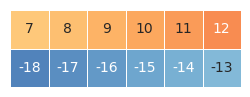

In [112]:
visualize_2D(A_B_1[1, ...], '沿深度堆叠，axis = 1，第1页', 24, -24)

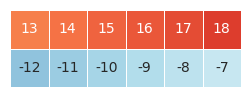

In [111]:
visualize_2D(A_B_1[2, ...], '沿深度堆叠，axis = 1，第2页', 24, -24)

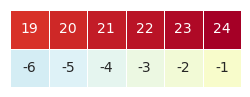

In [115]:
visualize_2D(A_B_1[3, ...], '沿深度堆叠，axis = 1，第3页', 24, -24)

In [114]:
# 取出A
A_B_1[:, 0, :]

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

#### axis = 2，左右堆叠

In [116]:
A_B_2 = np.stack((A, B), axis=2)  
# dimension 2
A_B_2

array([[[  1, -24],
        [  2, -23],
        [  3, -22],
        [  4, -21],
        [  5, -20],
        [  6, -19]],

       [[  7, -18],
        [  8, -17],
        [  9, -16],
        [ 10, -15],
        [ 11, -14],
        [ 12, -13]],

       [[ 13, -12],
        [ 14, -11],
        [ 15, -10],
        [ 16,  -9],
        [ 17,  -8],
        [ 18,  -7]],

       [[ 19,  -6],
        [ 20,  -5],
        [ 21,  -4],
        [ 22,  -3],
        [ 23,  -2],
        [ 24,  -1]]])

In [117]:
A_B_2.shape

(4, 6, 2)

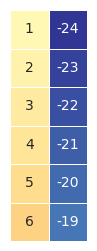

In [118]:
visualize_2D(A_B_2[0, ...], '沿深度堆叠，axis = 2，第0页', 24, -24)

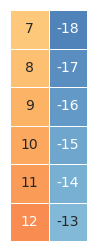

In [119]:
visualize_2D(A_B_2[1, ...], '沿深度堆叠，axis = 2，第1页', 24, -24)

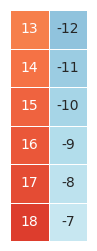

In [120]:
visualize_2D(A_B_2[2, ...], '沿深度堆叠，axis = 2，第2页', 24, -24)

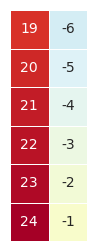

In [123]:
visualize_2D(A_B_2[3, ...], '沿深度堆叠，axis = 2，第3页', 24, -24)

In [122]:
# 取出A
A_B_2[...,0]

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24]])

## 重复

### 重复numpy.repeat()

In [146]:
a_1D = np.arange(-2,2+1)

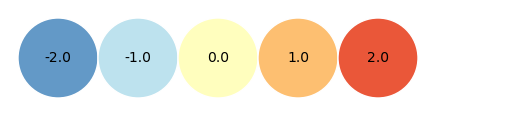

In [147]:
visualize_1D(a_1D, 'a_1D，一维', 3, -3)

In [47]:
np.repeat(a_1D, 2)

array([-3, -3, -2, -2, -1, -1,  0,  0,  1,  1,  2,  2])

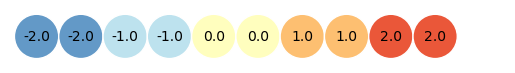

In [148]:
visualize_1D(np.repeat(a_1D, 2), 'a_1D，一维，重复两次', 3, -3)

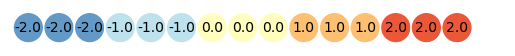

In [149]:
visualize_1D(np.repeat(a_1D, 3), 'a_1D，一维，重复三次', 3, -3)

### 瓷砖numpy.tile()

In [150]:
np.tile(a_1D, 2)

array([-2, -1,  0,  1,  2, -2, -1,  0,  1,  2])

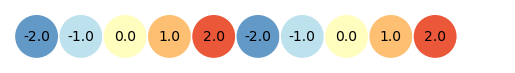

In [151]:
visualize_1D(np.tile(a_1D, 2), 'a_1D，一维，瓷砖二次', 3, -3)

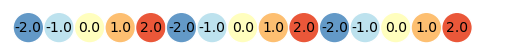

In [152]:
visualize_1D(np.tile(a_1D, 3), 'a_1D，一维，瓷砖三次', 3, -3)

In [49]:
np.tile(a_1D, (2,1))

array([[-3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2]])

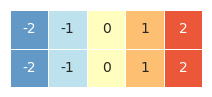

In [154]:
visualize_2D(np.tile(a_1D, (2,1)), 'a_1D，一维，瓷砖(2,1)', 3, -3)

In [50]:
np.tile(a_1D, (2,2))

array([[-3, -2, -1,  0,  1,  2, -3, -2, -1,  0,  1,  2],
       [-3, -2, -1,  0,  1,  2, -3, -2, -1,  0,  1,  2]])

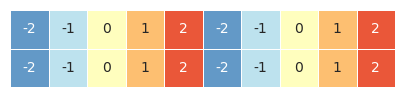

In [155]:
visualize_2D(np.tile(a_1D, (2,2)), 'a_1D，一维，瓷砖(2,2)', 3, -3)

In [51]:
A = a_1D.reshape(2,3)
A

array([[-3, -2, -1],
       [ 0,  1,  2]])

In [52]:
np.tile(A, 2)

array([[-3, -2, -1, -3, -2, -1],
       [ 0,  1,  2,  0,  1,  2]])

In [53]:
np.tile(A, (2,1))

array([[-3, -2, -1],
       [ 0,  1,  2],
       [-3, -2, -1],
       [ 0,  1,  2]])

In [54]:
np.tile(A, (2,2))

array([[-3, -2, -1, -3, -2, -1],
       [ 0,  1,  2,  0,  1,  2],
       [-3, -2, -1, -3, -2, -1],
       [ 0,  1,  2,  0,  1,  2]])

## 分块矩阵

### 合成

In [160]:
A = np.eye(2)
A

array([[1., 0.],
       [0., 1.]])

In [161]:
B = np.arange(-4,4+1).reshape(3,3)
B

array([[-4, -3, -2],
       [-1,  0,  1],
       [ 2,  3,  4]])

In [166]:
M = np.block([[A,                np.zeros((2, 3))],
              [np.zeros((3, 2)), B               ]])
M

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0., -4., -3., -2.],
       [ 0.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  2.,  3.,  4.]])

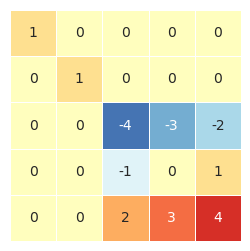

In [165]:
visualize_2D(M, '合成矩阵M', 5, -5)

### 切割

#### 沿指定轴numpy.split()

In [188]:
a_1D = np.arange(-9,9)
a_1D

array([-9, -8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,
        8])

In [189]:
len(a_1D)

18

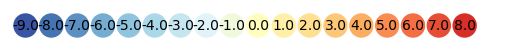

In [190]:
visualize_1D(a_1D, 'a_1D，一维', 10, -10)

In [191]:
a_3_splits = np.split(a_1D, 3)
a_3_splits

[array([-9, -8, -7, -6, -5, -4]),
 array([-3, -2, -1,  0,  1,  2]),
 array([3, 4, 5, 6, 7, 8])]

In [175]:
a_3_splits[0]

array([-4, -3, -2])

In [176]:
a_3_splits[1]

array([-1,  0,  1])

In [177]:
a_3_splits[2]

array([2, 3, 4])

In [194]:
np.split(a_1D, [3, 5, 6, 10, 16])
# 指定切割indexes 

[array([-9, -8, -7]),
 array([-6, -5]),
 array([-4]),
 array([-3, -2, -1,  0]),
 array([1, 2, 3, 4, 5, 6]),
 array([7, 8])]

In [180]:
A_9_by_9 = np.arange(-40,40+1).reshape(9,9)
A_9_by_9

array([[-40, -39, -38, -37, -36, -35, -34, -33, -32],
       [-31, -30, -29, -28, -27, -26, -25, -24, -23],
       [-22, -21, -20, -19, -18, -17, -16, -15, -14],
       [-13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5],
       [ -4,  -3,  -2,  -1,   0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9,  10,  11,  12,  13],
       [ 14,  15,  16,  17,  18,  19,  20,  21,  22],
       [ 23,  24,  25,  26,  27,  28,  29,  30,  31],
       [ 32,  33,  34,  35,  36,  37,  38,  39,  40]])

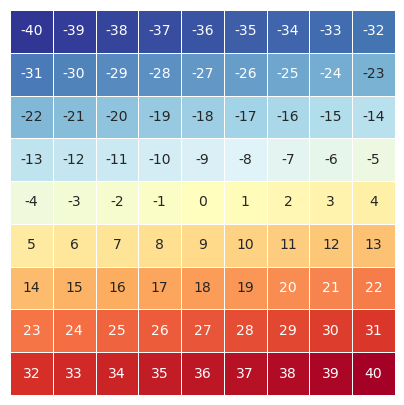

In [185]:
visualize_2D(A_9_by_9, 'A_9_by_9', 40, -40)

In [183]:
A_3_splits_axis_0 = np.split(A_9_by_9, 3)
A_3_splits_axis_0

[array([[-40, -39, -38, -37, -36, -35, -34, -33, -32],
        [-31, -30, -29, -28, -27, -26, -25, -24, -23],
        [-22, -21, -20, -19, -18, -17, -16, -15, -14]]),
 array([[-13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5],
        [ -4,  -3,  -2,  -1,   0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9,  10,  11,  12,  13]]),
 array([[14, 15, 16, 17, 18, 19, 20, 21, 22],
        [23, 24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39, 40]])]

In [184]:
A_3_splits_axis_1 = np.split(A_9_by_9, 3, axis = 1)
A_3_splits_axis_1

[array([[-40, -39, -38],
        [-31, -30, -29],
        [-22, -21, -20],
        [-13, -12, -11],
        [ -4,  -3,  -2],
        [  5,   6,   7],
        [ 14,  15,  16],
        [ 23,  24,  25],
        [ 32,  33,  34]]),
 array([[-37, -36, -35],
        [-28, -27, -26],
        [-19, -18, -17],
        [-10,  -9,  -8],
        [ -1,   0,   1],
        [  8,   9,  10],
        [ 17,  18,  19],
        [ 26,  27,  28],
        [ 35,  36,  37]]),
 array([[-34, -33, -32],
        [-25, -24, -23],
        [-16, -15, -14],
        [ -7,  -6,  -5],
        [  2,   3,   4],
        [ 11,  12,  13],
        [ 20,  21,  22],
        [ 29,  30,  31],
        [ 38,  39,  40]])]

#### 沿着水平方向切割

In [196]:
np.hsplit(A_9_by_9, 3)

[array([[-40, -39, -38],
        [-31, -30, -29],
        [-22, -21, -20],
        [-13, -12, -11],
        [ -4,  -3,  -2],
        [  5,   6,   7],
        [ 14,  15,  16],
        [ 23,  24,  25],
        [ 32,  33,  34]]),
 array([[-37, -36, -35],
        [-28, -27, -26],
        [-19, -18, -17],
        [-10,  -9,  -8],
        [ -1,   0,   1],
        [  8,   9,  10],
        [ 17,  18,  19],
        [ 26,  27,  28],
        [ 35,  36,  37]]),
 array([[-34, -33, -32],
        [-25, -24, -23],
        [-16, -15, -14],
        [ -7,  -6,  -5],
        [  2,   3,   4],
        [ 11,  12,  13],
        [ 20,  21,  22],
        [ 29,  30,  31],
        [ 38,  39,  40]])]

#### 沿着竖直方向切割

In [197]:
np.vsplit(A_9_by_9, 3)

[array([[-40, -39, -38, -37, -36, -35, -34, -33, -32],
        [-31, -30, -29, -28, -27, -26, -25, -24, -23],
        [-22, -21, -20, -19, -18, -17, -16, -15, -14]]),
 array([[-13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5],
        [ -4,  -3,  -2,  -1,   0,   1,   2,   3,   4],
        [  5,   6,   7,   8,   9,  10,  11,  12,  13]]),
 array([[14, 15, 16, 17, 18, 19, 20, 21, 22],
        [23, 24, 25, 26, 27, 28, 29, 30, 31],
        [32, 33, 34, 35, 36, 37, 38, 39, 40]])]

## 插入、删除

### 附加numpy.append()

In [198]:
np.append([1, 2, 3], [[4, 5, 6], [7, 8, 9]])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [199]:
np.append([[1, 2, 3], [4, 5, 6]], [[7, 8, 9]], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### 插入

In [69]:
a = np.array([[1, 1], [2, 2], [3, 3]])
np.insert(a, [1], [[1],[2],[3]], axis=1)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

In [70]:
np.insert(a, 1, [1, 2, 3], axis=1)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

### 删除

In [71]:
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
np.delete(arr, 1, 0)

array([[ 1,  2,  3,  4],
       [ 9, 10, 11, 12]])

In [72]:
# Repo: https://github.com/Visualize-ML
# Book 1 Python for Beginners  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023